https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [3]:
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### 3. Divide en train y test

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("actual", axis = 1)
y = df["actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)

dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### 5. Calcula su MAE
Sin usar sklearn

In [9]:
predictions = dt.predict(X_test)

errors = abs(predictions - np.array(y_test))

print("MAE:", np.mean(errors), "degrees")

MAE: 4.885714285714286 degrees


### 6. Calcula su MAPE
Sin usar sklearn

In [12]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

print("Accuracy:", accuracy)

Accuracy: 92.29677952490061


### 7. Representa el árbol de decision

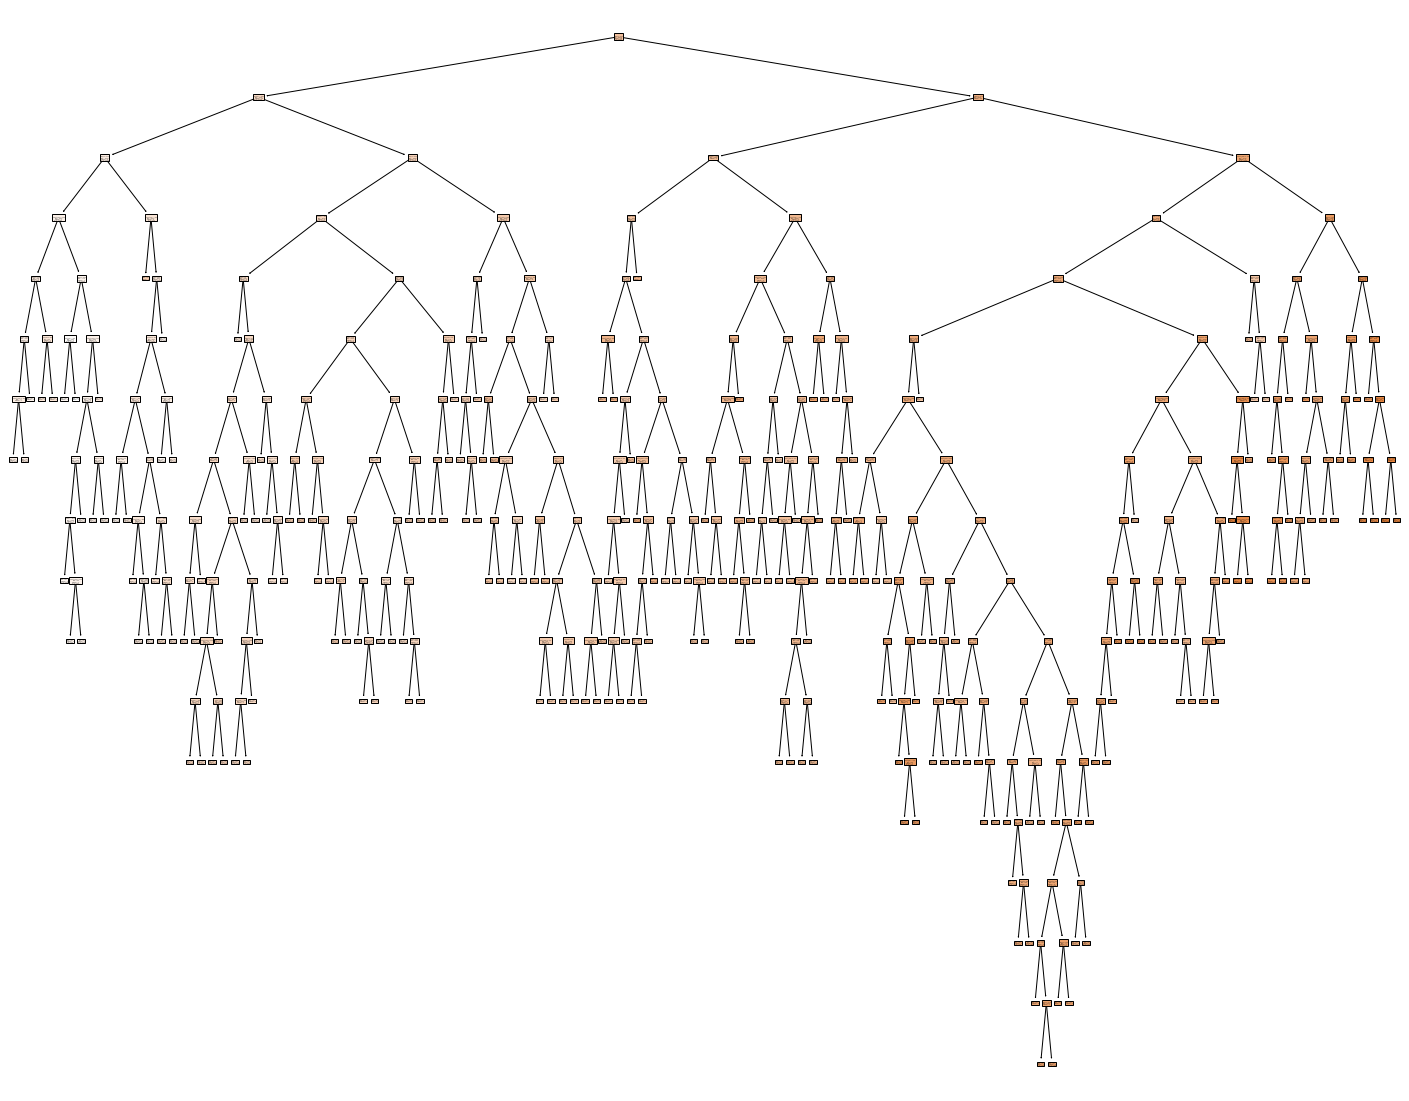

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [15]:
dt2 = DecisionTreeRegressor(max_depth = 3, random_state = 42)

dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular si MAE

In [16]:
predictions = dt2.predict(X_test)

errors = abs(predictions - np.array(y_test))

print("MAE:", np.mean(errors), "degrees")

MAE: 4.5567196265742504 degrees


### 10. Vuelve a representar su árbol

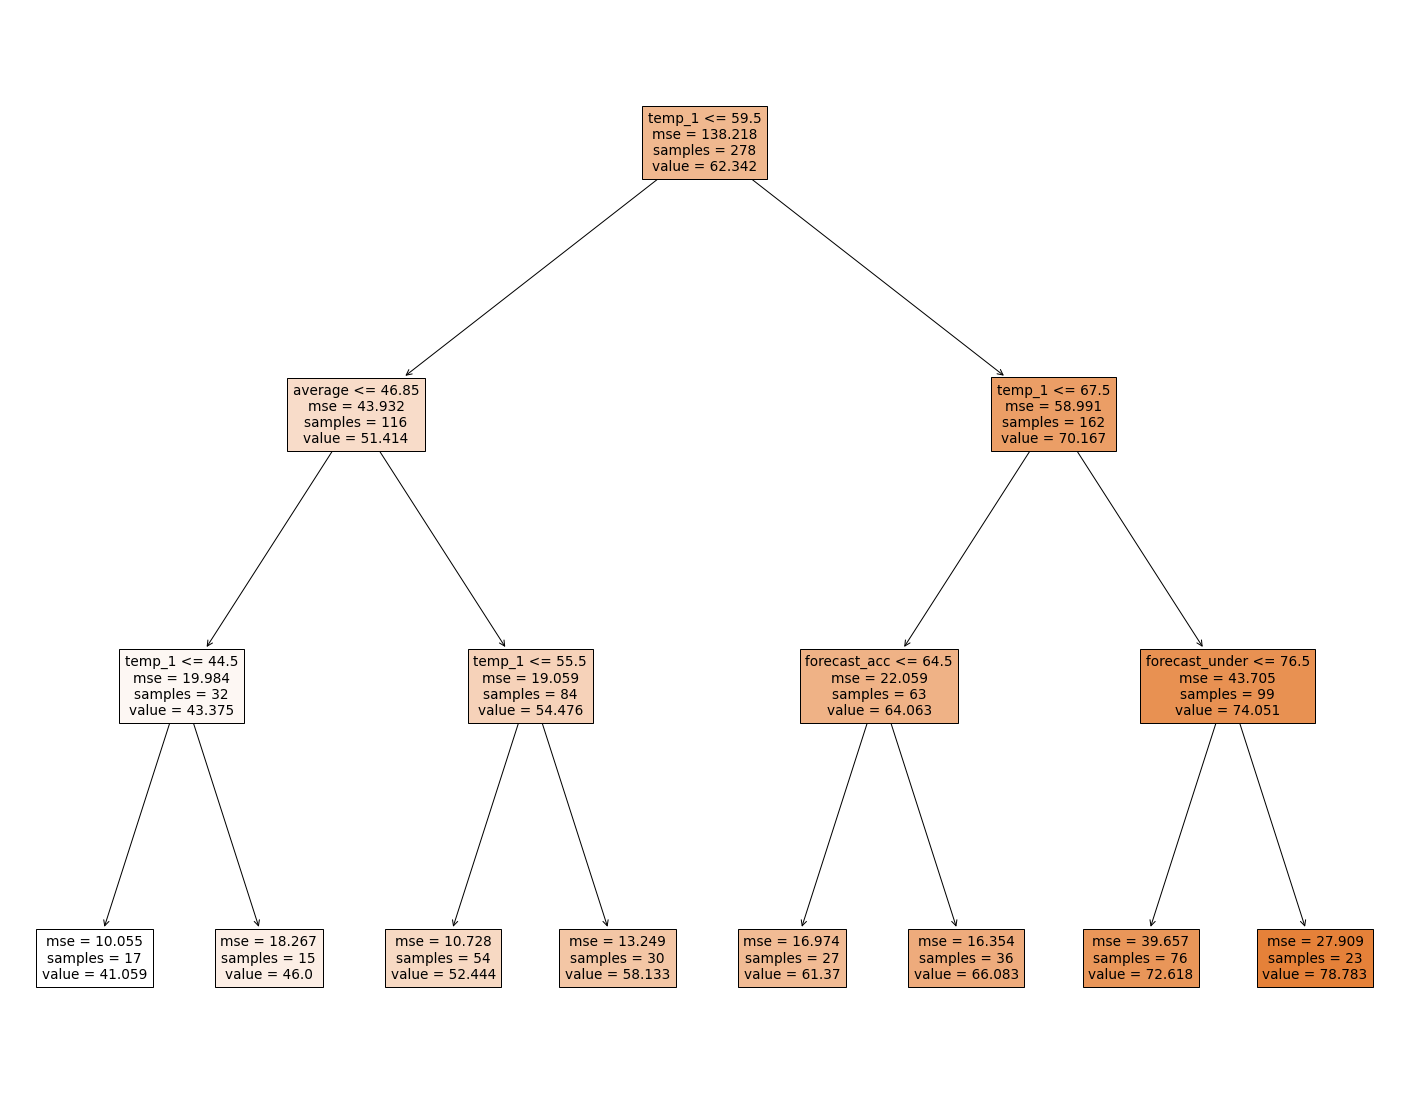

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt2, 
                   feature_names=X.columns,  
                   class_names="actual",
                   filled=True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [21]:
for ind, x in enumerate(dt2.feature_importances_):
    print(X.columns[ind], ":", x)

year : 0.0
month : 0.0
day : 0.0
temp_2 : 0.0
temp_1 : 0.8802075128034851
average : 0.08841158765377367
forecast_noaa : 0.0
forecast_acc : 0.01060993136963865
forecast_under : 0.02077096817310268
friend : 0.0
week_Fri : 0.0
week_Mon : 0.0
week_Sat : 0.0
week_Sun : 0.0
week_Thurs : 0.0
week_Tues : 0.0
week_Wed : 0.0
